## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [244]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid
import datetime as dt
import plotly.express as px

In [14]:
customer_data=pd.read_csv('Online Retail.csv',encoding= 'unicode_escape')
customer_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [15]:
customer_data.shape

(541909, 8)

In [16]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [18]:
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [19]:
pd.DataFrame(customer_data.isna().mean())

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.249267
Country,0.000000


### 25 % of items purchase are not assigned to  Customers
- Hence there is no use of having the data with out customer assignment
- So its better to Delete them from data frame

In [20]:
customer_data.dropna(subset=['CustomerID'],inplace=True)


In [21]:
customer_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- There are no null values in the dataset

## Exploring Countries contribution to statistics in data

In [22]:
country_grouped_data=customer_data.groupby(["InvoiceNo","Country"]).count().reset_index().\
groupby("Country").count()["InvoiceNo"].reset_index().\
rename(columns={"InvoiceNo":"Count"}).sort_values("Count",ascending=False)\
.reset_index().drop('index',axis=1)
country_grouped_data

,Country,Count
0,United Kingdom,19857
1,Germany,603
2,France,458
3,EIRE,319
4,Belgium,119
5,Spain,105
6,Netherlands,101
7,Switzerland,71
8,Portugal,70
9,Australia,69


## total there are 36 countries making purchases

<AxesSubplot:xlabel='Country', ylabel='Count'>

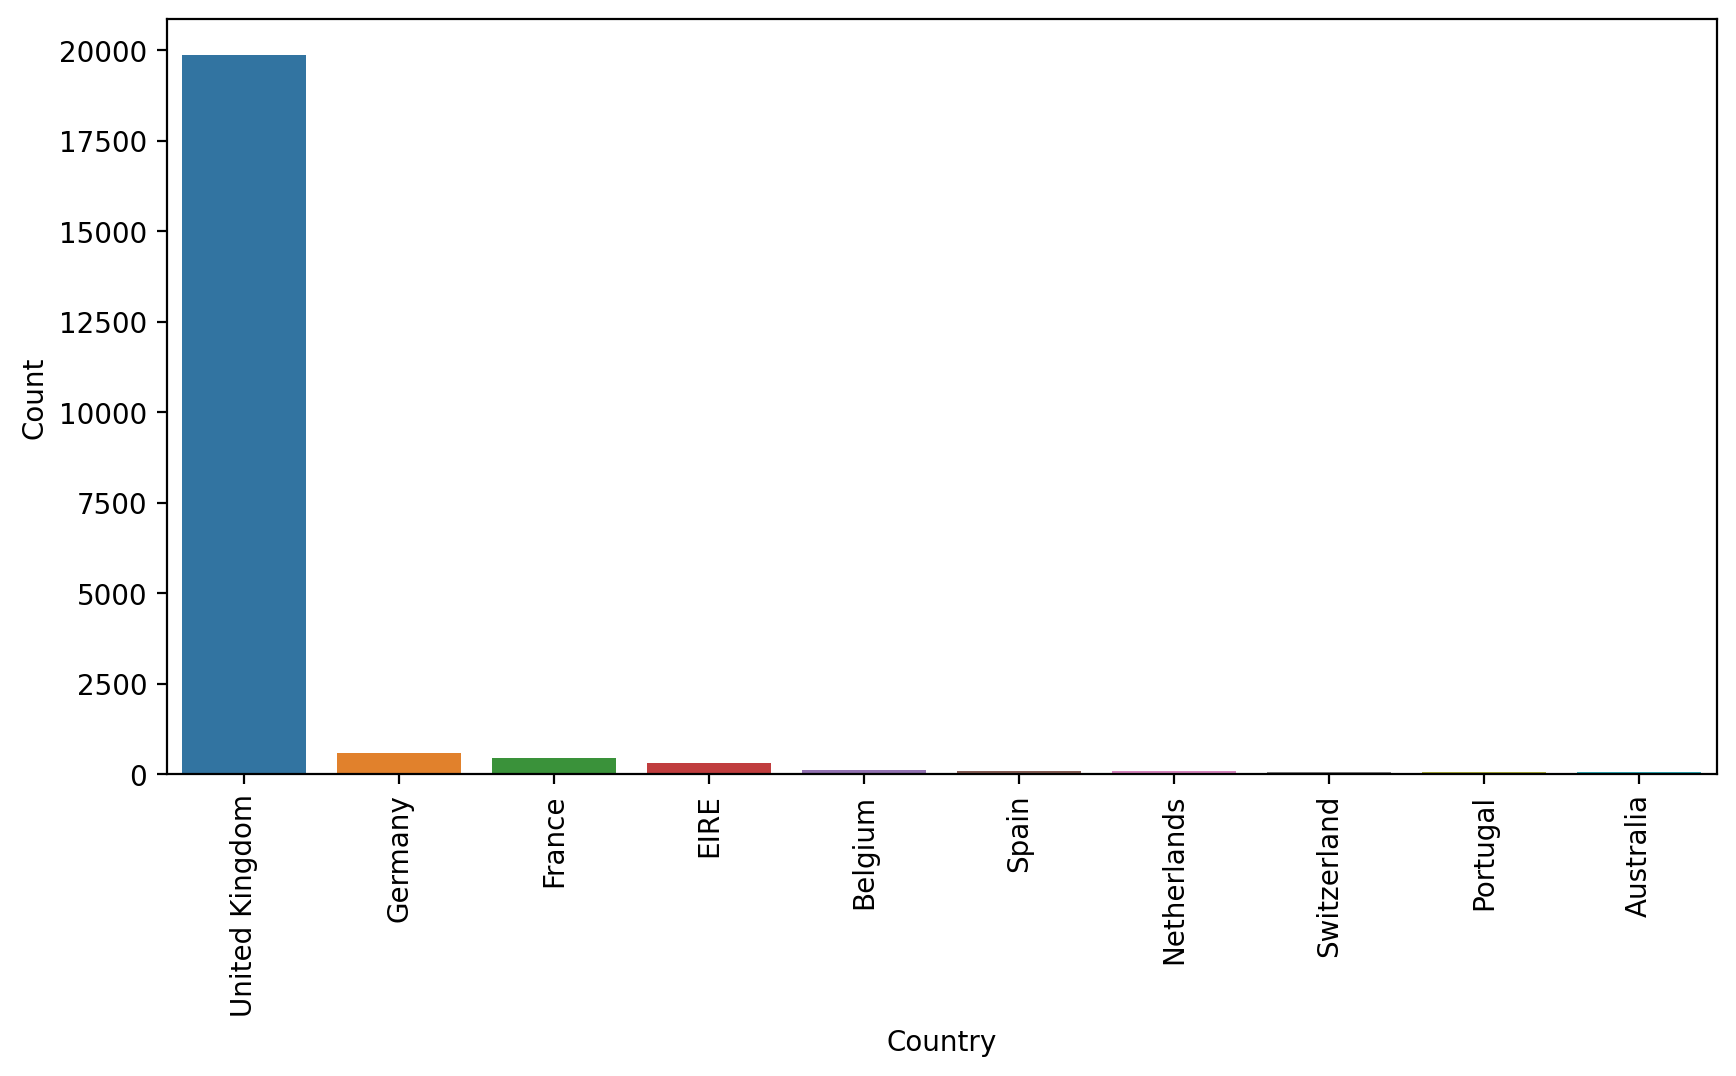

In [68]:
plt.figure(figsize=(10,5),dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=country_grouped_data.head(10),x="Country",y="Count")

- United Kingdom is making most of the purchases compared to other countries

<AxesSubplot:xlabel='Country'>

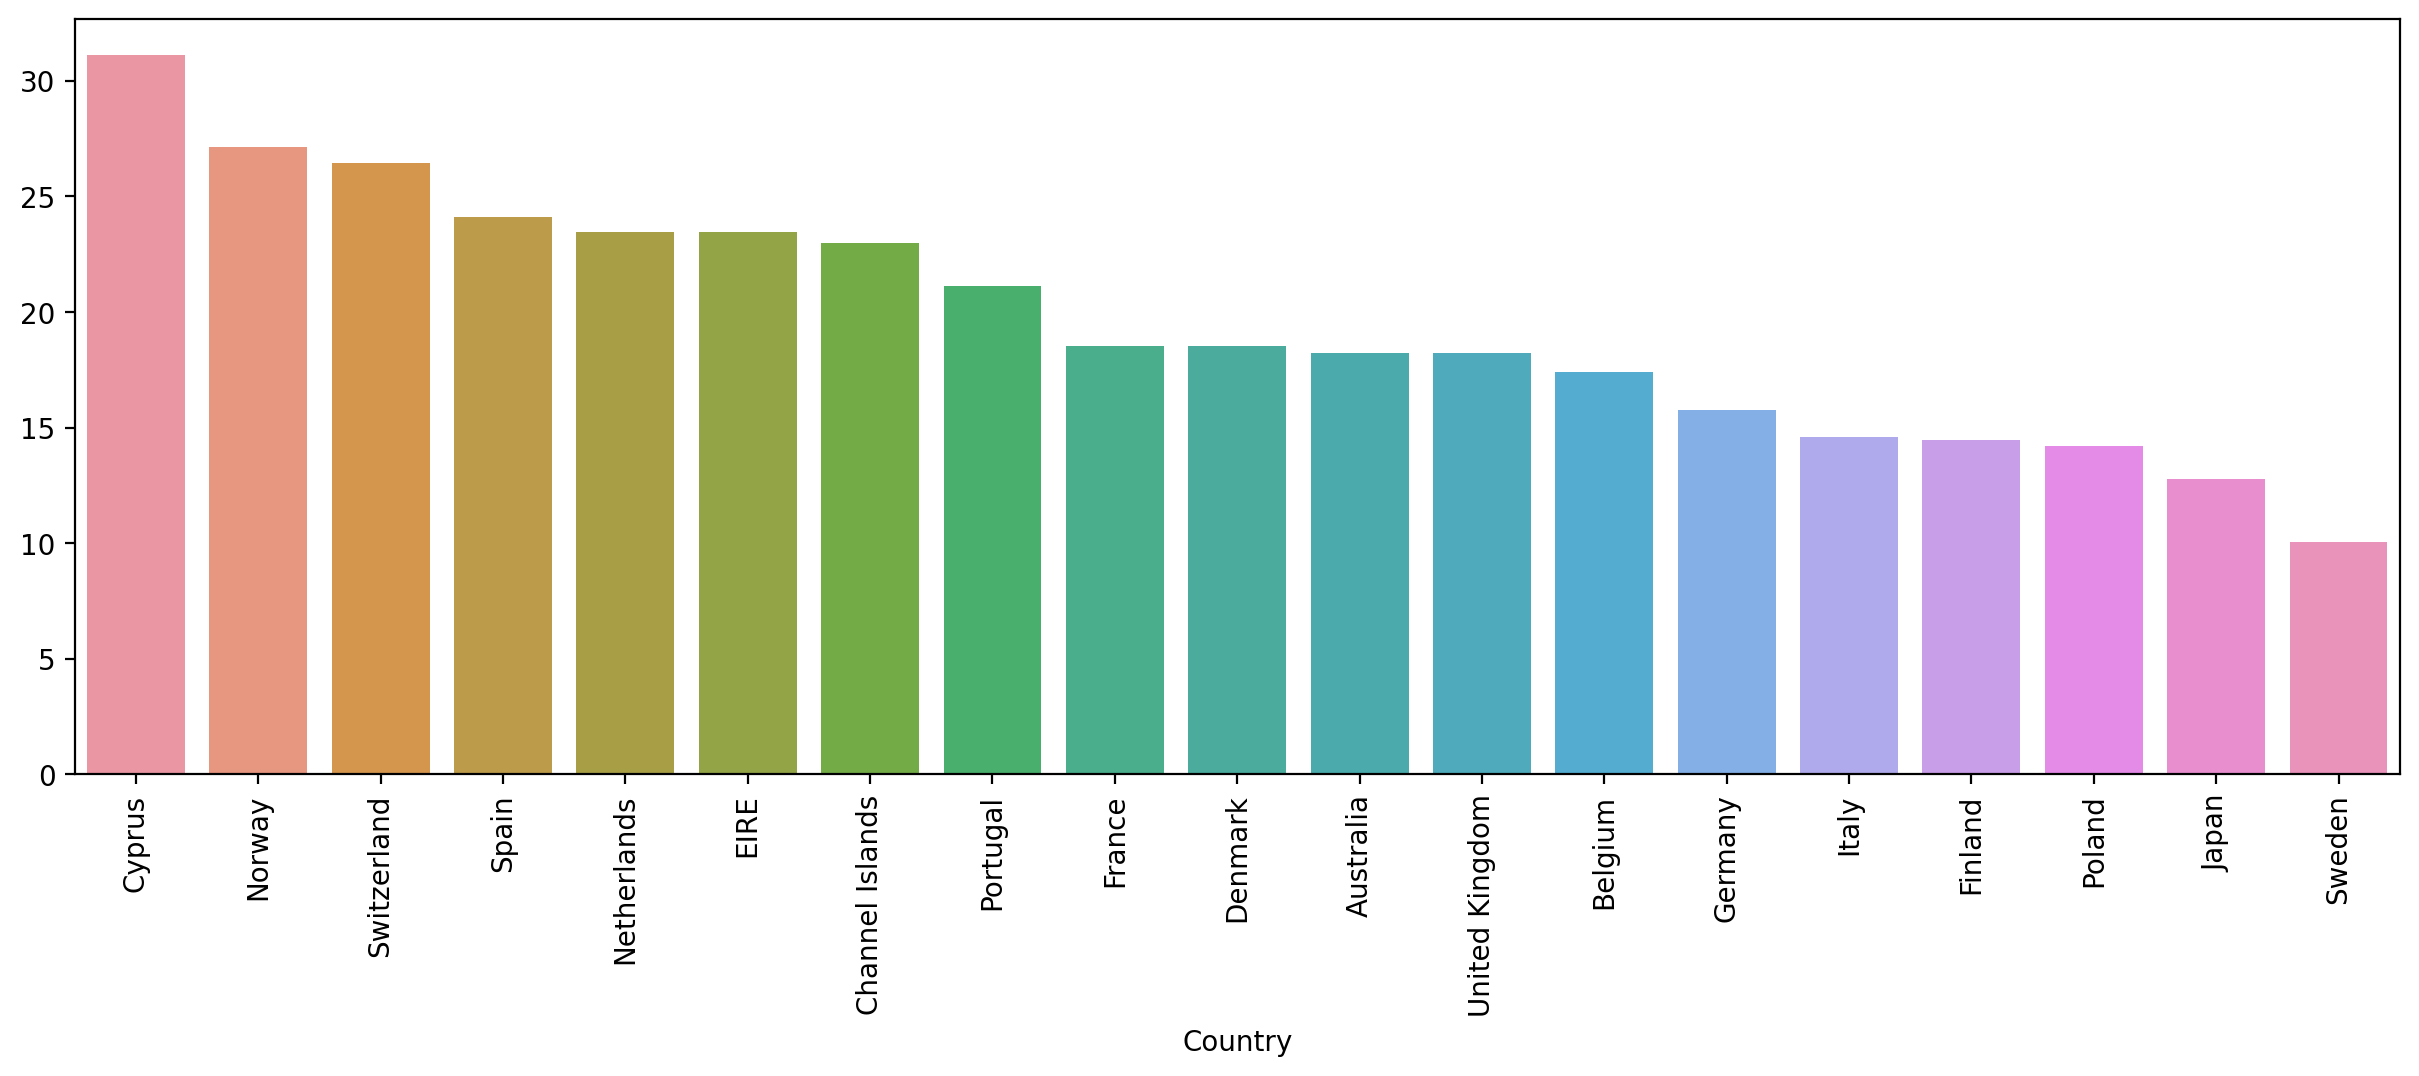

In [24]:
average_items_purchase_country_wise=customer_data.groupby(["InvoiceNo","Country"]).count().groupby("Country").mean()["Quantity"]
country_with20_min_invoices=country_grouped_data[country_grouped_data["Count"]>19].Country.values
average_items_purchase_country_wise=\
    average_items_purchase_country_wise\
    [average_items_purchase_country_wise.index.isin(country_with20_min_invoices)].sort_values(ascending=False)

plt.figure(figsize=(15,5),dpi=200)
plt.xticks(rotation=90)
sns.barplot(y=average_items_purchase_country_wise.values,x=average_items_purchase_country_wise.index)

- Above is the bar graph of the average items purchased from countries that are having more than 20 transaction (more than 20 invoices)

# Removing items from uncanceled list that came back for cancellation

In [25]:
customer_data_1=customer_data.copy()
cancelled_items=pd.DataFrame()
cancelled_items_=customer_data_1[customer_data_1["Quantity"]< 0].sort_values("Quantity")
def find_similar_data(cancel_item):
    cancelled_item_index=cancel_item
    cancel_item=customer_data_1.loc[cancel_item]
    item_name=cancel_item.Description
    item_stockcode=cancel_item.StockCode
    item_quantity=-1 * cancel_item.Quantity
    item_customer_id=cancel_item.CustomerID
    condition_1=customer_data_1['StockCode']==item_stockcode
    condition_2=customer_data_1['Quantity']==item_quantity
    condition_3=customer_data_1['Description']==item_name
    condition_4=customer_data_1['CustomerID']==item_customer_id
    df=customer_data_1[condition_1 & condition_2 & condition_3 & condition_4]
    if df.shape[0]==1:
        df["Canceled_status"]=f"ORDER CANCELED"
    elif df.shape[0]==0:
        df.loc[cancelled_item_index,:]=cancel_item
        df["Canceled_status"]=f"NO PURCHASE RECORD"
    elif df.shape[0]>1:
        df["Canceled_status"]=f"SAME ITEM ALREADY PURCHASED"
    try:
        customer_data_1.drop([df.index[0],cancelled_item_index],axis=0,inplace=True)
        cancelled_items[df.index[0]]=df.iloc[0,:]
    except:
        None

cancelled_items_.reset_index().rename(columns={'index':"cancelled_index"})["cancelled_index"].apply(lambda x:find_similar_data(x))
cancelled_items.T

C:\Users\Melon\AppData\Local\Temp/ipykernel_9072/385954294.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Canceled_status"]=f"ORDER CANCELED"
C:\Users\Melon\AppData\Local\Temp/ipykernel_9072/385954294.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[cancelled_item_index,:]=cancel_item
C:\Users\Melon\AppData\Local\Temp/ipykernel_9072/385954294.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled_status
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom,ORDER CANCELED
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346.0,United Kingdom,ORDER CANCELED
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360.0,02-12-2010 14:23,0.03,15838.0,United Kingdom,NO PURCHASE RECORD
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,11-01-2011 12:55,2.1,15749.0,United Kingdom,SAME ITEM ALREADY PURCHASED
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,11-01-2011 12:55,1.85,15749.0,United Kingdom,SAME ITEM ALREADY PURCHASED
...,...,...,...,...,...,...,...,...,...
349851,C567536,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1.0,21-09-2011 09:52,7.95,14284.0,United Kingdom,NO PURCHASE RECORD
349871,C567540,23173,REGENCY TEAPOT ROSES,-1.0,21-09-2011 10:00,9.95,12384.0,Switzerland,NO PURCHASE RECORD
176843,C552029,20982,12 PENCILS TALL TUBE SKULLS,-1.0,05-05-2011 18:11,0.85,15622.0,United Kingdom,NO PURCHASE RECORD
176839,C552029,22681,FRENCH BLUE METAL DOOR SIGN 6,-1.0,05-05-2011 18:11,1.25,15622.0,United Kingdom,NO PURCHASE RECORD


NO PURCHASE RECORD             5544
ORDER CANCELED                 2034
SAME ITEM ALREADY PURCHASED    1075
MANUAL                          175
DISCOUNT                         77
Name: Canceled_status, dtype: int64


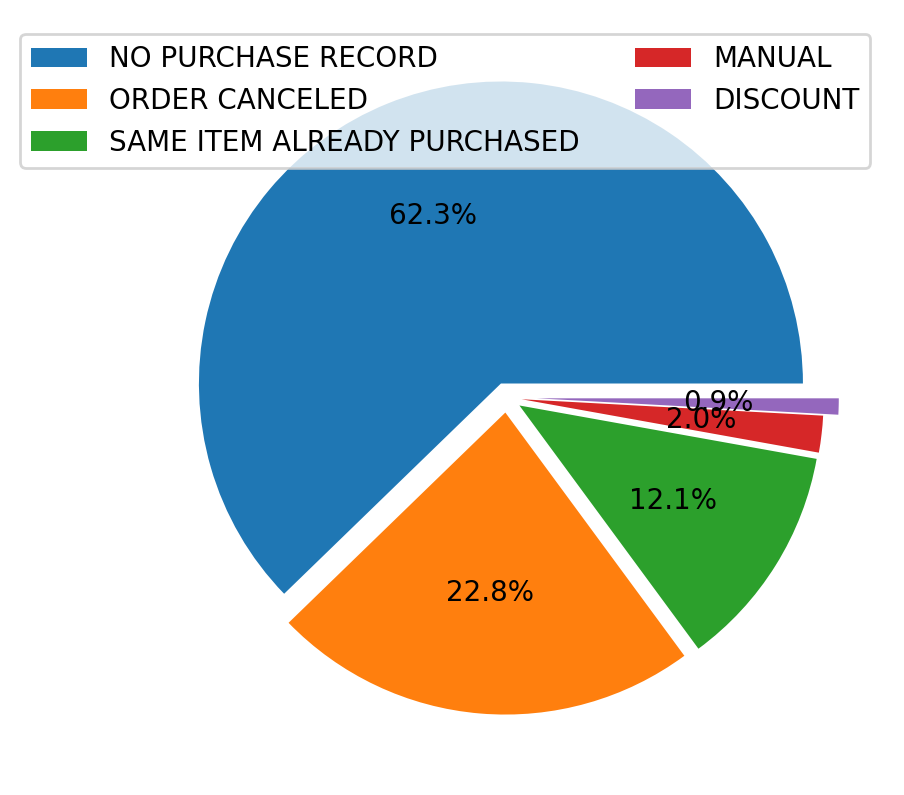

NO PURCHASE RECORD             5544
ORDER CANCELED                 2034
SAME ITEM ALREADY PURCHASED    1075
MANUAL                          175
DISCOUNT                         77
Name: Canceled_status, dtype: int64

In [27]:
cancelled_items_1=cancelled_items.T
# a=set(customer_data_1["InvoiceNo"].unique())
# b=set(cancelled_items_1['InvoiceNo'].unique())
# c=a.intersection(b)
# print(len(a),len(b),len(c))
cancelled_items_1.loc[cancelled_items_1["StockCode"]=="D","Canceled_status"]="DISCOUNT"
cancelled_items_1.loc[cancelled_items_1["StockCode"]=="M","Canceled_status"]="MANUAL"
canceled_invoice_reason=cancelled_items_1["Canceled_status"].value_counts()
print(canceled_invoice_reason)
plt.figure(figsize=(5,5),dpi=200)
plt.pie(canceled_invoice_reason,
        explode = [0.05,0.05,0.05,0.05,0.1],
        autopct='%.1f%%')
plt.legend(labels = canceled_invoice_reason.index,ncol=2)
plt.show()
display(canceled_invoice_reason)

## Total there are 8905 items having invoice status as canceled
- Out of 8905 of canceled invoices
 1. 22 % i.e 2060 items is been canceled
 2. 12 % i.e 1103 items is been canceled and **ordered again**
 3. 62 % i.e 5742 items is been canceled but they have **no similar purchase record**
 4. 2 % i.e 175 are manual
 4. 0.9 % i.e 77 are discounts given 

In [30]:
print("Before Removing Canceled Invoice")
print(f' There are {len(customer_data["CustomerID"].unique())} Customer')
print(f' There are {len(customer_data["Description"].unique())} Items')
print(f' There are {len(customer_data["InvoiceNo"].unique())} Transactions')
print("After Removing Canceled Invoice")
print(f' There are {len(customer_data_1["CustomerID"].unique())} Customer')
print(f' There are {len(customer_data_1["Description"].unique())} Items')
print(f' There are {len(customer_data_1["InvoiceNo"].unique())} Transactions')


Before Removing Canceled Invoice
 There are 4372 Customer
 There are 3896 Items
 There are 22190 Transactions
After Removing Canceled Invoice
 There are 4326 Customer
 There are 3862 Items
 There are 18371 Transactions


In [31]:
stock_code_not_sold=set(cancelled_items_1["StockCode"].unique())-set(customer_data_1["StockCode"].unique())
# stock_code_not_sold.remove("Discount")
items_never_purchased=cancelled_items_1[cancelled_items_1["StockCode"].isin(stock_code_not_sold)].groupby("Description")["Quantity"].sum()
items_never_purchased=items_never_purchased.drop(["CRUK Commission","Discount"]).reset_index().rename(columns={"StockCode":"Stock Cancelled"})
items_never_purchased[["Description"]]

,Description
0,2 DAISIES HAIR COMB
1,ANTIQUE LILY FAIRY LIGHTS
2,ASSORTED TUTTI FRUTTI ROUND BOX
3,BLACK 3 BEAD DROP EARRINGS
4,BLUE FLYING SINGING CANARY
5,BLUE PADDED SOFT MOBILE
6,CLASSIC DIAMANTE EARRINGS JET
7,CREAM SWEETHEART MAGAZINE RACK
8,CREAM SWEETHEART SHELF + HOOKS
9,CREAM SWEETHEART TRAYS


## Above are list of the items in the given data that are never made a revenue (zero sales)  
- Because came back due to cancellation 

In [32]:
unprevilaged_customer=set(cancelled_items_1["CustomerID"].unique())-set(customer_data_1["CustomerID"].unique())
# stock_code_not_sold.remove("Discount")
customer_never_purchased=cancelled_items_1[cancelled_items_1["CustomerID"].isin(unprevilaged_customer)].groupby("CustomerID")["Quantity"].count()
# customer_never_purchased=customer_never_purchased.drop(["CRUK Commission","Discount"]).reset_index().rename(columns={"StockCode":"Stock Cancelled"})
customer_never_purchased.reset_index()[["CustomerID"]]


,CustomerID
0,12346.0
1,12454.0
2,12503.0
3,12505.0
4,12558.0
5,12605.0
6,12607.0
7,12666.0
8,12870.0
9,12943.0


## Above are list of the Customer ID in the given data never made a transaction
- Because they canceled the transaction they made 

17.21 % of transactions is cancelled
1.05 % of customers purchased nothing and have no transaction due to order cancellation
0.87 % of items in the data given is never purchased due to order cancellation 


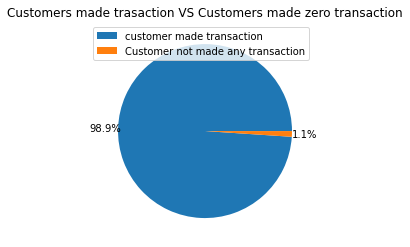

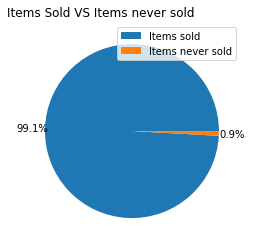

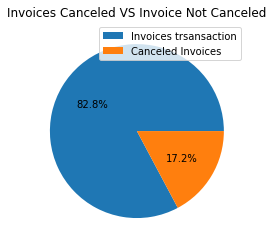

In [67]:
no_of_customer_before=len(customer_data["CustomerID"].unique())
no_of_items_before=len(customer_data["Description"].unique())
no_of_invoice_before=len(customer_data["InvoiceNo"].unique())
no_of_customer_after=len(customer_data_1["CustomerID"].unique())
no_of_items_after=len(customer_data_1["Description"].unique())
no_of_invoice_after=len(customer_data_1["InvoiceNo"].unique())

difference_in_change_customer=no_of_customer_before-no_of_customer_after
difference_in_change_invoice=no_of_invoice_before-no_of_invoice_after
difference_in_change_items=no_of_items_before-no_of_items_after



print(f"{np.round(100*(difference_in_change_invoice)/no_of_invoice_before,2)} % of transactions is cancelled")
print(f"{np.round(100*(difference_in_change_customer)/no_of_customer_before ,2)} % of customers purchased nothing and have no transaction due to order cancellation")
print(f"{np.round(100*(difference_in_change_items)/no_of_items_before ,2)} % of items in the data given is never purchased due to order cancellation ")
plt.pie(x=[no_of_customer_after,difference_in_change_customer],autopct='%.1f%%',explode=[0,0],pctdistance=1.15)
plt.legend(labels=["customer made transaction","Customer not made any transaction"])
plt.title("Customers made trasaction VS Customers made zero transaction")
plt.show()

plt.pie(x=[no_of_items_after,difference_in_change_items],autopct='%.1f%%',explode=[0,0],pctdistance=1.15)
plt.legend(labels=["Items sold","Items never sold"])
plt.title("Items Sold VS Items never sold                ")
plt.show()

plt.pie(x=[no_of_invoice_after,difference_in_change_invoice],autopct='%.1f%%',explode=[0,0])
plt.legend(labels=["Invoices trsansaction","Canceled Invoices"])
plt.title("Invoices Canceled VS Invoice Not Canceled")
plt.show()

1. 17% of transaction has been deleted
2. 1.05% of customers have no transaction due to canceled orders
3. 0.87% of items in the given data are never purchased

## After removing the canceled items from the data that came back for cancellation 


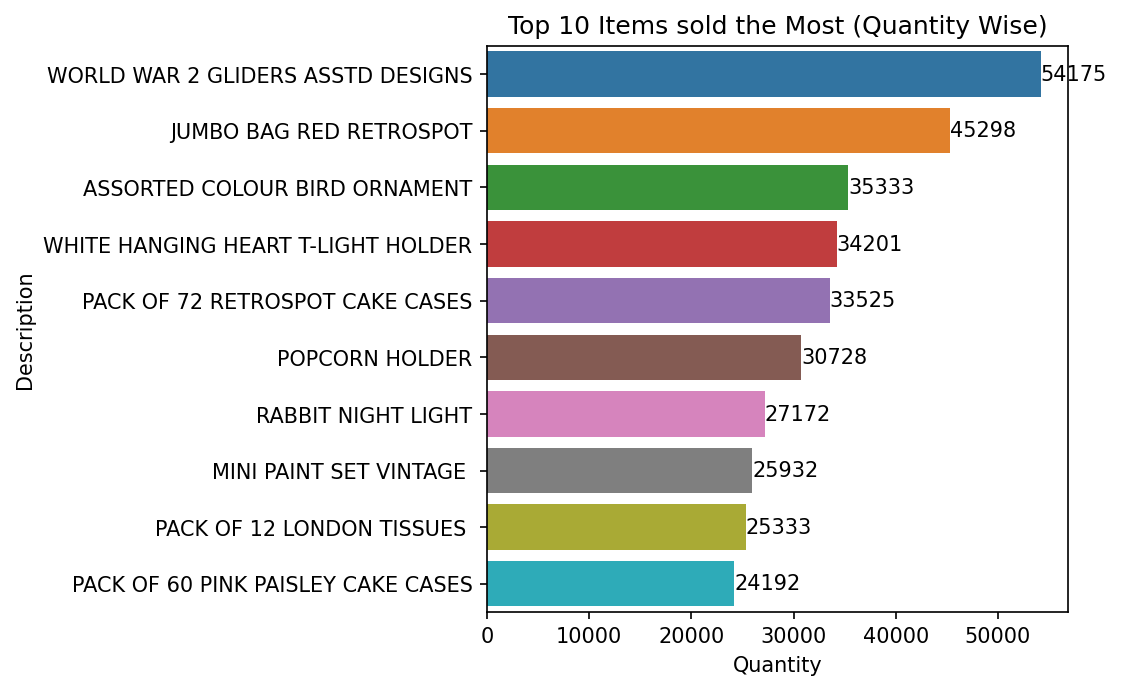

In [98]:
top_sold_items_quantity_wise=customer_data_1.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
plt.figure(figsize=(5,5),dpi=150)
ax=sns.barplot(data=top_sold_items_quantity_wise.head(10),x="Quantity",y="Description")
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Top 10 Items sold the Most (Quantity Wise)")
plt.show()

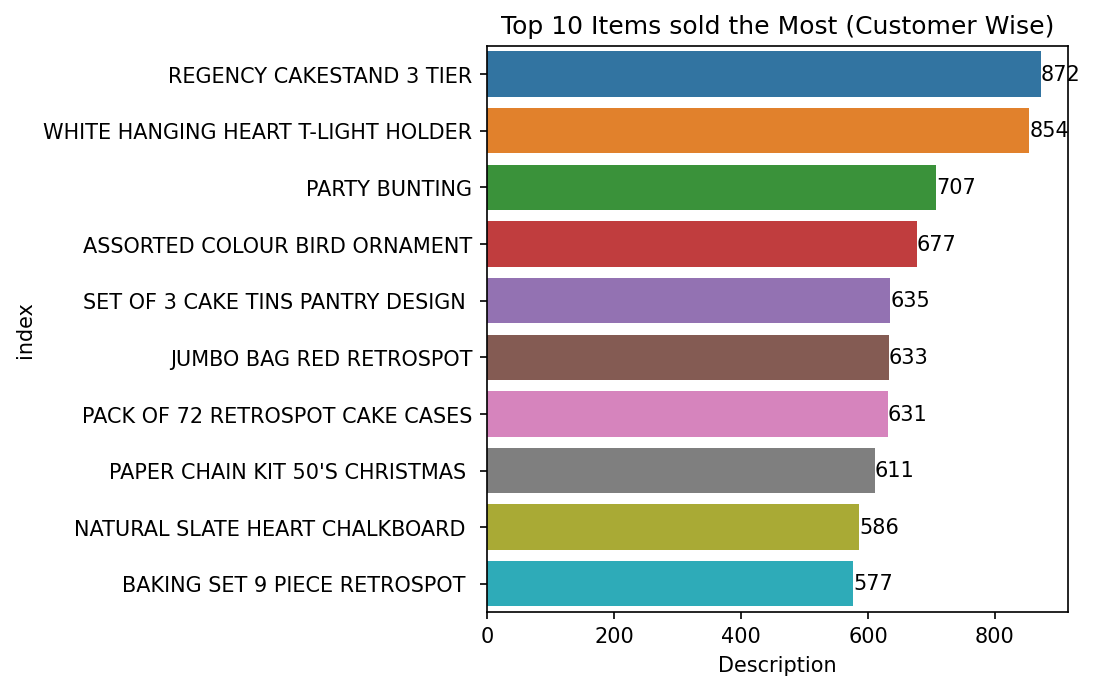

In [96]:
# top_sold_items_customer_wise=
customer_data_1.groupby(["Description","CustomerID"],as_index=False).count()["Description"].value_counts().reset_index()
plt.figure(figsize=(5,5),dpi=150)
ax=sns.barplot(data=top_sold_items_customer_wise.head(10),y="index",x="Description")
plt.title("Top 10 Items sold the Most (Customer Wise)")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

- Top 10 items purchased quantity wise

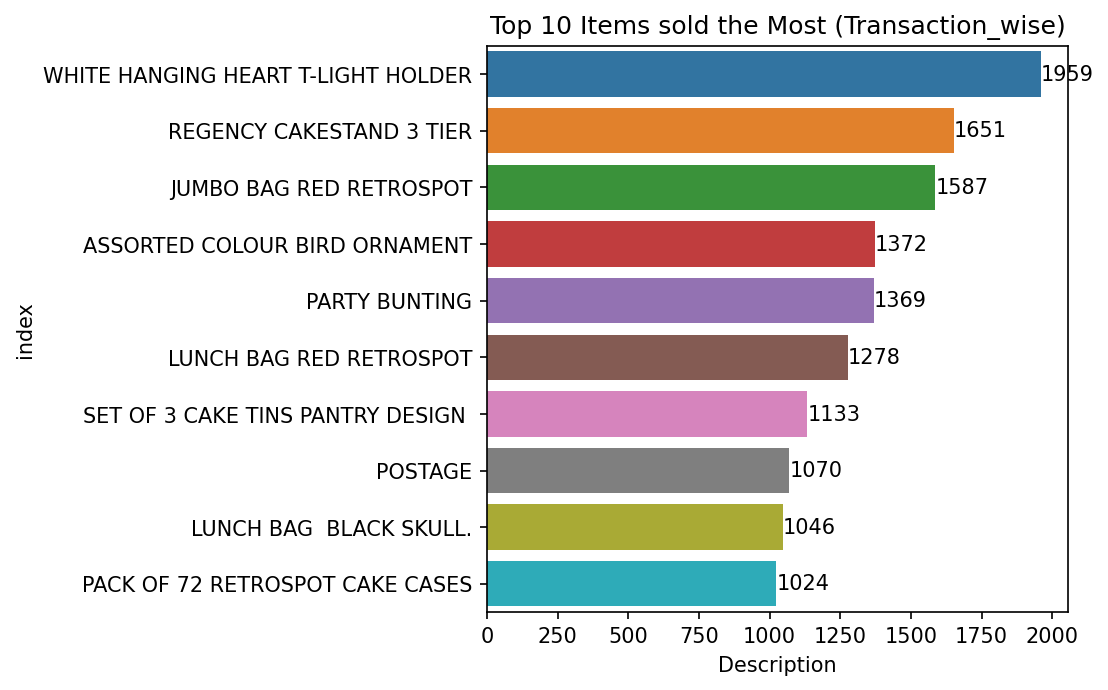

In [112]:
top_sold_items_transaction_wise=customer_data_1.groupby(["Description","InvoiceNo"],as_index=False).count()["Description"].value_counts().reset_index()
plt.figure(figsize=(5,5),dpi=150)
ax=sns.barplot(data=top_sold_items_transaction_wise.head(10),y="index",x="Description")
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Top 10 Items sold the Most (Transaction_wise)")
plt.show()

- from this box plot we can see that most of the items prices are below 200 pound sterling

In [254]:
customer_data["Total_Cost"]=customer_data["Quantity"]*customer_data["UnitPrice"]


In [181]:
top_items_made_profit=customer_data.groupby("Description")["Total_Cost"].sum().sort_values(ascending=False).reset_index()
display(top_items_made_profit.head(15))
plt.figure(figsize=(3,3),dpi=200)
ax=sns.barplot(data=top_15_items_made_profit.head(15),y="Description",x="Total_Cost")


In [122]:
customer_data_1["InvoiceDate"]=pd.to_datetime(customer_data_1["InvoiceDate"])
customer_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394761 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    394761 non-null  object        
 1   StockCode    394761 non-null  object        
 2   Description  394761 non-null  object        
 3   Quantity     394761 non-null  int64         
 4   InvoiceDate  394761 non-null  datetime64[ns]
 5   UnitPrice    394761 non-null  float64       
 6   CustomerID   394761 non-null  float64       
 7   Country      394761 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.1+ MB


In [138]:
customer_data_1["day"]=customer_data_1["InvoiceDate"].dt.day
customer_data_1["month"]=customer_data_1["InvoiceDate"].dt.month

<AxesSubplot:>

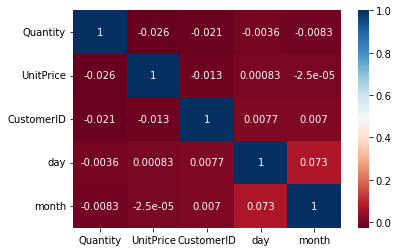

In [144]:
sns.heatmap(customer_data_1.corr(),annot=True,cmap='RdBu')

In [149]:
customer_data_1[customer_data_1["StockCode"].str.contains('^[A-Za-z]+')]['StockCode'].unique()

array(['POST', 'M', 'BANK CHARGES', 'C2', 'PADS', 'DOT'], dtype=object)

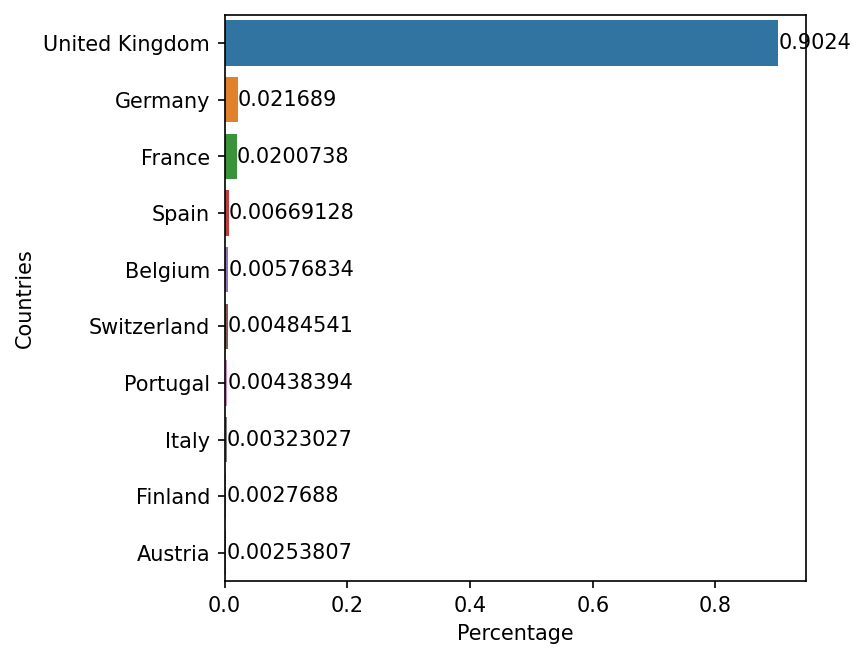

In [188]:
customer_count_country_wise=customer_data_1.groupby(["Country","CustomerID"],as_index=False).count()[["Country","CustomerID"]]["Country"].value_counts()
customer_count_country_wise=customer_count_country_wise.reset_index().rename(columns={"index":"Countries","Country":"No_ofCustomers"})
# customer_count_country_wise
total_customer=customer_count_country_wise["No_ofCustomers"].sum()
customer_count_country_wise["Percentage"]=customer_count_country_wise["No_ofCustomers"]/total_customer
plt.figure(figsize=(5,5),dpi=150)
ax=sns.barplot(data=customer_count_country_wise.head(10),x="Percentage",y="Countries")
for i in ax.containers:
    ax.bar_label(i,)

## Above graph indicates that 90% of customers are from United-Kingdom

In [200]:
customer_data_1["InvoiceDate"].max()

Timestamp('2011-12-10 17:19:00')

- The Latest Date recorded is on 10th of December 2011

## RFM analysis
### 1. R- Recency (Recent on-line visit by the customers)
### 2. F- Frequency (How frequently customers visits on-line page)
### 3. M- Monetary (How much customers have spend by purchasing on-line products )

1. Since Most of the Customers are wholesalers we cannot group customers based on the **demographic group like age, gender, income** and **behavioral and psycho-graphic group**
2. Because Our Customers purchase bunch of goods from us and sell it to individual customers
3. We only need to deal issues and make clusters related to B2B Business to Business instead of B2C  i.e. Direct from Business to Customers
4. **WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT** 
5. ***They sell it to individual customers(B2C) or sell all products to another stores (B2B)***

# Due to all these reasons we need to cluster customers according to there activities i.e
## 1. R- Recency
## 2. F- Frequency
## 3. M- Monetary


### We need to group customers by  
### 1. High Profile (Spends more Visits More)
### 2. Medium Profile (Spends Less Average On-line site Visit frequency )
### 3. Low Profile (Less On-line Site visit frequency (Customer about to lose interest [ Churning ]))

Source=https://www.optimove.com/resources/learning-center/rfm-segmentation

In [333]:
latest_date=dt.datetime(2011,12,11)
#Create RFM Modelling scores for each customer
customer_data_1["Total_Cost"]=customer_data_1["Quantity"]*customer_data_1["UnitPrice"]
RFM_chart=customer_data_1.groupby('CustomerID').agg({'InvoiceDate': lambda date:(latest_date - date.max()).days,
                                           "InvoiceNo":lambda invoice: invoice.count(),
                                            "Total_Cost": lambda cost:cost.sum()})
RFM_chart.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total_Cost":"Monetary"},inplace=True)
RFM_chart.reset_index(inplace=True)
RFM_chart


,CustomerID,Recency,Frequency,Monetary
0,12347.0,40,182,4310.00
1,12348.0,76,31,1797.24
2,12349.0,19,73,1757.55
3,12350.0,311,17,334.40
4,12352.0,73,75,1545.41
...,...,...,...,...
4321,18280.0,160,10,180.60
4322,18281.0,4,7,80.82
4323,18282.0,216,12,178.05
4324,18283.0,10,756,2094.88


In [334]:
RFM_chart.describe()

,CustomerID,Recency,Frequency,Monetary
count,4326.000000,4326.000000,4326.000000,4326.000000
mean,15301.251965,105.633842,91.253121,1958.638785
std,1720.181377,115.303322,226.628221,8380.518822
min,12347.000000,0.000000,1.000000,0.000000
25%,13815.250000,22.000000,17.000000,305.560000
50%,15300.500000,61.000000,41.000000,664.400000
75%,16777.750000,162.000000,99.000000,1633.277500
max,18287.000000,697.000000,7731.000000,279846.020000


In [335]:
RFM_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4326 non-null   float64
 1   Recency     4326 non-null   int64  
 2   Frequency   4326 non-null   int64  
 3   Monetary    4326 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.3 KB


- From the above list we can differentiate transactions by
1. Less product purchases in an invoice (1 - 4 products)
2. More product purchases in an invoice (more than 50 products)
3. Average number of product purchases

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



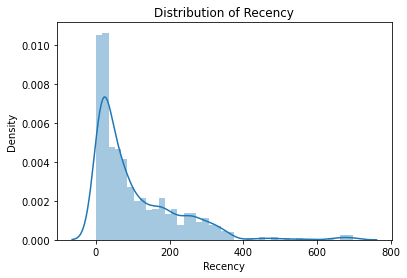

In [336]:
sns.distplot(RFM_chart["Recency"])
plt.title("Distribution of Recency")
plt.show()

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



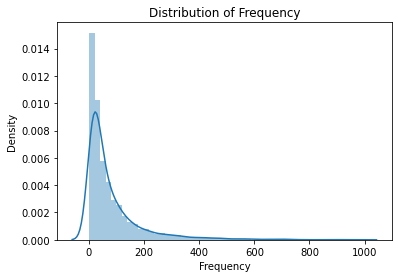

In [337]:
sns.distplot(RFM_chart[RFM_chart["Frequency"]<1000]["Frequency"])
plt.title("Distribution of Frequency")
plt.show()

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



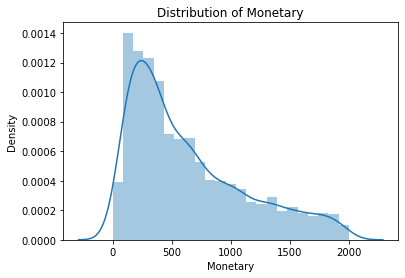

In [338]:
sns.distplot(RFM_chart[RFM_chart["Monetary"]<2000]["Monetary"])
plt.title("Distribution of Monetary")
plt.show()

## We can make 4 groups of customers of similar activities

- **Group 1** 
|Group | Recency | Frequency | Monetary |
| ---| --- | --- | --- |
| **Group1**     | **R-Tier-1 (most recent)** | **F-Tier-1 (most frequent)** | 	**M-Tier-1 (highest spend)** |
| **Group2** | **R-Tier-2** | **F-Tier-2** | 	**M-Tier-2** |
| **Group3** | **R-Tier-3** | **F-Tier-3** | **M-Tier-3** |
| **Group4** | **R-Tier-4 (least recent)** | **F-Tier-4 (only one transaction)** | **M-Tier-4 (lowest spend)** |

1. **Best Customers** - Customer from this group will have **Recency , Frequency ,Monetary as R-Tier-1, F-Tier-1 and M-Tier-1** respectively , In short we can indicate rfm as **1-1-1**

2. **High Spending New Customers**- Customers from this group can be indicated as **1-4-2** transacted very less frequent but having good rank in Recency and Monetary

3. **Lowest-Spending Active Loyal Customers**- Customers from this group can be indicated in short notation as **1-1-3** or **1-1-4** they purchase frequently and recently with less money spent in purchasing

4. **Churned Best customers**- Customers from this group can be indicated its Recency, Frequency, and Monetary as **4-1-1, 4-1-2, 4-2-1 and 4-2-2**  they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted.

### **Recency,Frequency & Monetary Values Expectations**

1. **High Recency** Values is not good we need **less Recency** values that tells a customer is **Good Customer**
2. **High Frequency** Values is quality of **Good Customer** we should not have **less Frequency** values 
3. **High Monetary** Values is quality of **Good Customer** we should not have **less Monetary** values 


In [339]:
rank_quantiles=RFM_chart.quantile([0.25,0.5,0.75]).to_dict()
rank_quantiles

{'CustomerID': {0.25: 13815.25, 0.5: 15300.5, 0.75: 16777.75},
 'Recency': {0.25: 22.0, 0.5: 61.0, 0.75: 162.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 305.56000000000006,
  0.5: 664.4000000000001,
  0.75: 1633.2775}}

In [340]:
def return_R_score(value,feature,rank_quantiles):
    if value <= rank_quantiles[feature][0.25]:
        return 1
    elif value <= rank_quantiles[feature][0.5]:
        return 2
    elif value <= rank_quantiles[feature][0.75]:
        return 3
    else  :
        return 4
    
def return_FM_score(value,feature,rank_quantiles):
    if value <= rank_quantiles[feature][0.25]:
        return 4
    elif value <= rank_quantiles[feature][0.5]:
        return 3
    elif value <= rank_quantiles[feature][0.75]:
        return 2
    else :
        return 1
    
    

In [341]:
RFM_chart["Recency_Score"]=RFM_chart["Recency"].apply(lambda x:return_R_score(x,"Recency",rank_quantiles))
RFM_chart["Frequency_Score"]=RFM_chart["Frequency"].apply(lambda x:return_FM_score(x,"Frequency",rank_quantiles))
RFM_chart["Monetary_Score"]=RFM_chart["Monetary"].apply(lambda x:return_FM_score(x,"Monetary",rank_quantiles))

In [342]:
RFM_chart["RFM_group"]=RFM_chart.apply(lambda x:f'{int(x["Recency_Score"])}{int(x["Frequency_Score"])}{int(x["Monetary_Score"])}',axis=1)

In [343]:
RFM_chart["RFM_Score"]=RFM_chart.apply(lambda x:int(x["Recency_Score"]+ x["Frequency_Score"]+x["Monetary_Score"]),axis=1)

In [344]:
RFM_chart

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_group,RFM_Score
0,12347.0,40,182,4310.00,2,1,1,211,4
1,12348.0,76,31,1797.24,3,3,1,331,7
2,12349.0,19,73,1757.55,1,2,1,121,4
3,12350.0,311,17,334.40,4,4,3,443,11
4,12352.0,73,75,1545.41,3,2,2,322,7
...,...,...,...,...,...,...,...,...,...
4321,18280.0,160,10,180.60,3,4,4,344,11
4322,18281.0,4,7,80.82,1,4,4,144,9
4323,18282.0,216,12,178.05,4,4,4,444,12
4324,18283.0,10,756,2094.88,1,1,1,111,3


## Conversion of RFM_Score (Continues values) to Ranks (by performing binning)
 - Assigning badges like Platinum, Gold , Silver , Bronze to the customers depending upon the RFM Scores obtained
 - Badges i.e. Platinum, Gold, Silver, Bronze are ordinal.

In [345]:
badge_level=['Platinum', 'Gold', 'Silver', 'Bronze']
# score_bins=
RFM_chart["Customer_Badge"]=pd.cut(RFM_chart["RFM_Score"],bins=4,labels=badge_level)


In [346]:
RFM_chart

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_group,RFM_Score,Customer_Badge
0,12347.0,40,182,4310.00,2,1,1,211,4,Platinum
1,12348.0,76,31,1797.24,3,3,1,331,7,Gold
2,12349.0,19,73,1757.55,1,2,1,121,4,Platinum
3,12350.0,311,17,334.40,4,4,3,443,11,Bronze
4,12352.0,73,75,1545.41,3,2,2,322,7,Gold
...,...,...,...,...,...,...,...,...,...,...
4321,18280.0,160,10,180.60,3,4,4,344,11,Bronze
4322,18281.0,4,7,80.82,1,4,4,144,9,Silver
4323,18282.0,216,12,178.05,4,4,4,444,12,Bronze
4324,18283.0,10,756,2094.88,1,1,1,111,3,Platinum


In [347]:
fig = px.scatter_3d(RFM_chart, x='Recency', y='Frequency', z='Monetary',
                    color='Customer_Badge')
fig.show()

In [ ]:
# Creating dataset
z = RFM_chart["Recency"]
x = RFM_chart["Frequency"]
y = RFM_chart["Monetary"]
 
fig = px.scatter_3d(RFM_chart, x='Recency', y='Frequency', z='Monetary')
fig.show()

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

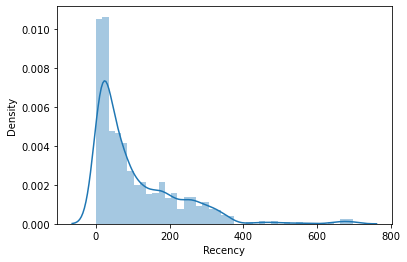

In [527]:
customers_invoice_less_items=customer_invoice_quantity_[customer_invoice_quantity_["Quantity"]<5]
display(customers_invoice_less_items)
percentage_less_item_transaction=customers_invoice_less_items.shape[0]/customer_invoice_quantity_.shape[0]*100
print(f'{np.round(percentage_less_item_transaction,2)}% of transaction are happened with less number of items purchase below 5 products')

,CustomerID,InvoiceNo,Quantity
10,12348.0,568172,3
15,12352.0,545332,2
14,12352.0,545323,4
16,12352.0,546869,1
21,12353.0,553900,4
...,...,...,...
18368,18273.0,565480,1
18369,18273.0,581136,1
18389,18283.0,575675,1
18385,18283.0,560032,1


18.06% of transaction are happened with less number of items purchase below 5 products


- There are around approx 3320 out of 18400 transactions customers have made just to purchase less than 5 product

In [533]:
customers_invoice_more_items=customer_invoice_quantity_[customer_invoice_quantity_["Quantity"]>50]
display(customers_invoice_more_items)
percentage_more_item_transaction=customers_invoice_more_items.shape[0]/customer_invoice_quantity_.shape[0]*100
print(f'{np.round(percentage_more_item_transaction,2)}% of transaction are happened with more number of items purchase above 50 products')

,CustomerID,InvoiceNo,Quantity
11,12349.0,577609,73
22,12354.0,550911,58
27,12357.0,574740,131
33,12359.0,571034,105
31,12359.0,543370,79
...,...,...,...
18388,18283.0,575668,59
18377,18283.0,540350,57
18383,18283.0,557956,87
18380,18283.0,550957,56


8.89% of transaction are happened with more number of items purchase above 50 products


- 1600 transaction out of 18000 transactions approx 8 % of transaction has happened with maximum purchases more than 50 products